<a href="https://colab.research.google.com/github/SriramyaK/Deep-Learning/blob/master/Car_booking_system_ver_1_0a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import sklearn
from datetime import date

In [159]:
path = '/content/drive/My Drive/Dataset'
os.listdir(path)

['test.csv', 'train_label.csv', 'test_label.csv', 'train.csv']

In [0]:
train_data = pd.read_csv(f'{path}/train.csv')
train_label = pd.read_csv(f'{path}/train_label.csv',header=None)
test_data = pd.read_csv(f'{path}/test.csv',parse_dates=True)
test_label = pd.read_csv(f'{path}/test_label.csv')

In [161]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [162]:
train_label.shape, train_data.shape

((8708, 1), (8708, 9))

In [0]:
train_data['Total Booking'] = train_label

In [164]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


Text(0, 0.5, 'Total Bookings')

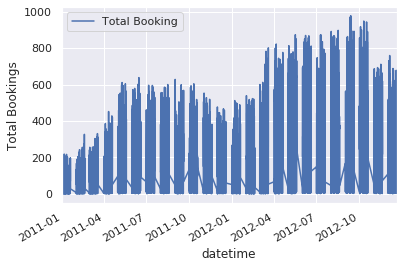

In [165]:
date_data = pd.DataFrame(pd.to_datetime(train_data['datetime']))
date_data['Total Booking'] = train_label
date_data = date_data.set_index('datetime')
date_data.plot()
plt.ylabel('Total Bookings')

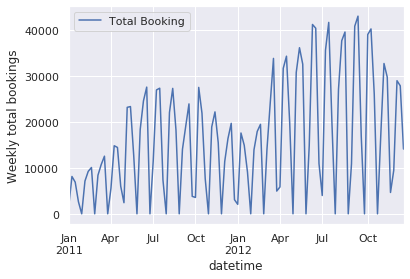

In [166]:
 weekly = date_data.resample('W').sum()        
 weekly.plot()        
 plt.ylabel('Weekly total bookings'); 

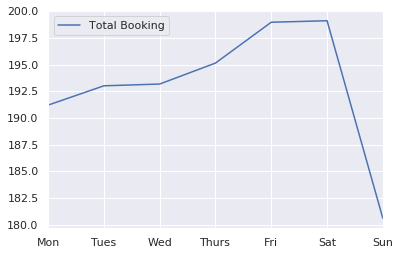

In [167]:
 by_weekday = date_data.groupby(date_data.index.dayofweek).mean()        
 by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']        
 by_weekday.plot();


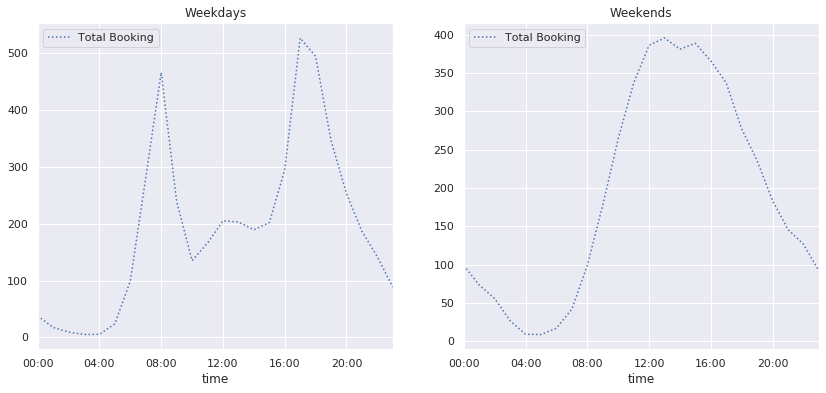

In [168]:
weekend = np.where(date_data.index.weekday < 5, 'Weekday', 'Weekend')        
by_time = date_data.groupby([weekend, date_data.index.time]).mean() 
hourly_ticks = 4 * 60 * 60 * np.arange(6)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))        
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])        
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',  xticks=hourly_ticks,style=[':', '--', '-'])


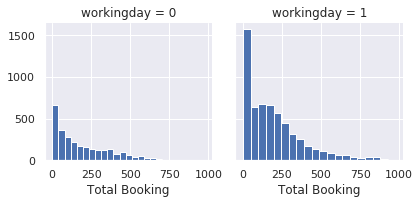

In [169]:
g = sns.FacetGrid(train_data, col='workingday')
g.map(plt.hist, 'Total Booking', bins=20)

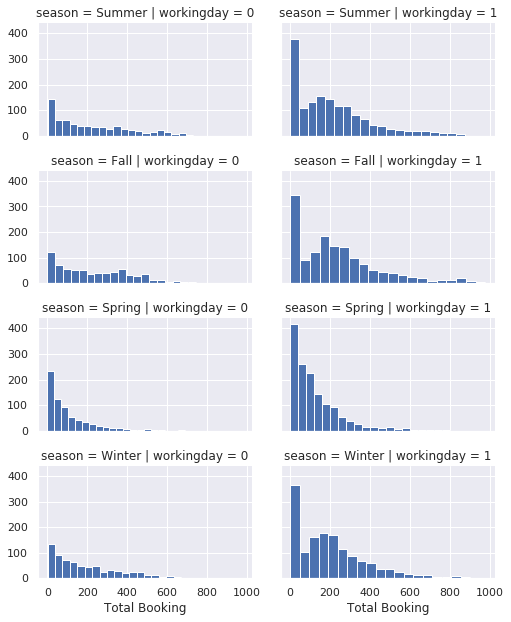

In [170]:
grid = sns.FacetGrid(train_data, col='workingday', row='season', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Total Booking', bins=20)
grid.add_legend();

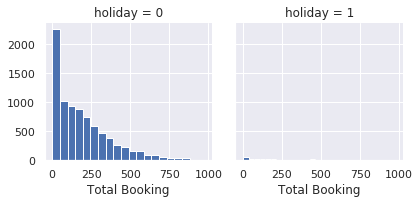

In [171]:
g = sns.FacetGrid(train_data, col='holiday')
g.map(plt.hist, 'Total Booking', bins=20)

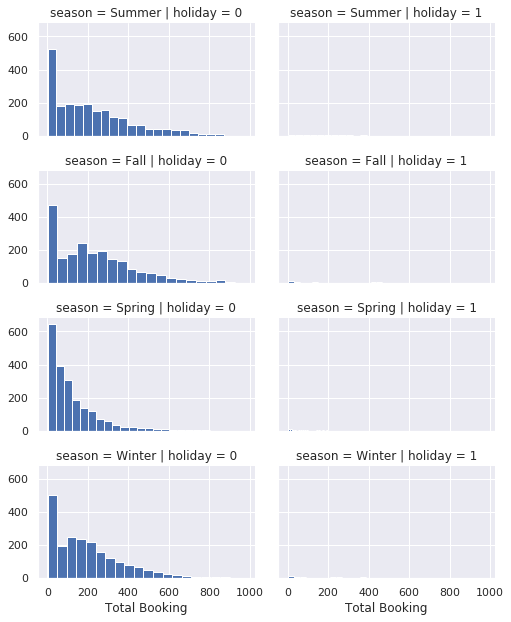

In [172]:
grid = sns.FacetGrid(train_data, col='holiday', row='season', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Total Booking', bins=20)
grid.add_legend();

In [173]:
train_data.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total Booking    0
dtype: int64

The info() method is useful to get a quick description of data, in particular the total number of rows, and each attribute's type and number of non-null values.

In [174]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
datetime         8708 non-null object
season           8708 non-null object
holiday          8708 non-null int64
workingday       8708 non-null int64
weather          8708 non-null object
temp             8708 non-null float64
atemp            8708 non-null float64
humidity         8708 non-null int64
windspeed        8708 non-null float64
Total Booking    8708 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


From the above info() method we can understand- 
1. 7 attributes are numerical.
2. No null values in the data.
3. 3 Columns are of object type datetime, season and weather.

Let's explore further:


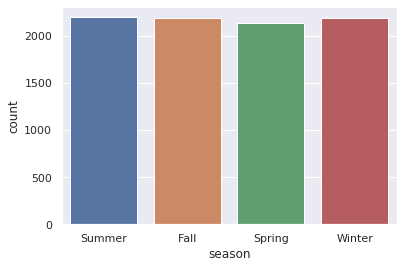

In [175]:
sns.countplot(x="season", data=train_data)

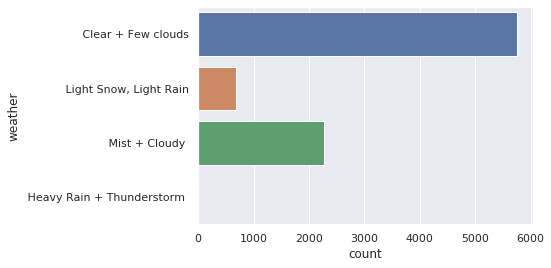

In [176]:
sns.countplot(y="weather", data=train_data)

In [177]:
train_data.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total Booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [0]:
attributes = ['temp',	'atemp',	'humidity',	'windspeed',	'Total Booking']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3ca1feac8>,
      dtype=object)

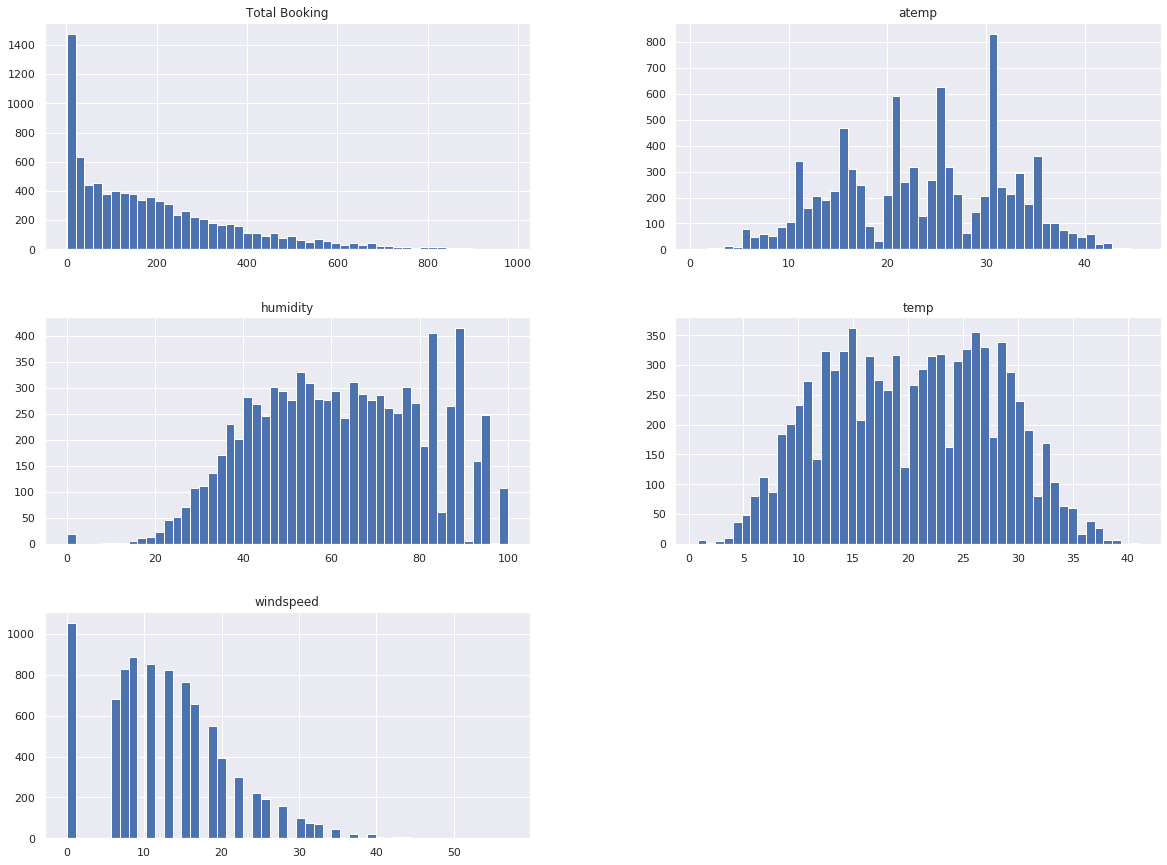

In [179]:
train_data[attributes].hist(bins=50, figsize=(20,15))

Outlier Analysis using Boxplots:

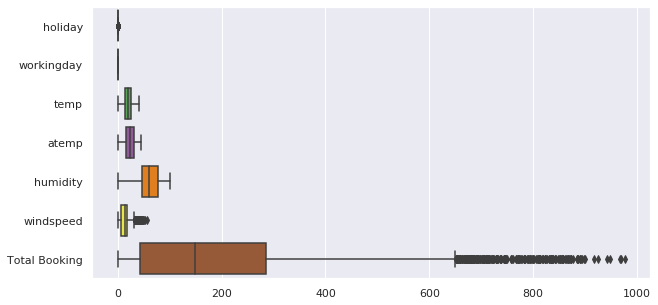

In [180]:
#sns.boxplot(x='windspeed',data=train_data)
plt.figure(figsize = (10,5))
ax = sns.boxplot(data = train_data, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [0]:
corr_matrix = train_data.corr()

In [182]:
corr_matrix["Total Booking"].sort_values(ascending=False)

Total Booking    1.000000
temp             0.397456
atemp            0.392754
windspeed        0.092090
workingday       0.012285
holiday         -0.004391
humidity        -0.307982
Name: Total Booking, dtype: float64

In [0]:
sns.pairplot(train_data[attributes])

In [0]:
sns.jointplot(x="Total Booking", y="temp", data=train_data);

**Preprocessing and Feature Engineering**
1. Convert the categorical variables in the train_data to one-hot encoding
2. Extract Date Features
3. Round decimal data
4. Normalize data for training

Often when dealing with continuous numeric attributes like proportions or percentages, we may not need the raw values having a high amount of precision. Hence it often makes sense to round off these high precision percentages into numeric integers. 

In [0]:
def preprocessing(data):
  
  date_data = pd.DataFrame(pd.to_datetime(data['datetime']))

  #Extracting Year from Date
  data['Year'] = date_data['datetime'].dt.year

  #Extracting Month from Date
  data['Month'] = date_data['datetime'].dt.month

  #Extracting the weekday name of the date
  data['day_name'] = date_data['datetime'].dt.day_name()

  final_data = data.drop(columns=['datetime'])

  def truncate(n):
    return round(n)

  final_data['temp'] = final_data['temp'].apply(truncate)
  final_data['atemp'] = final_data['atemp'].apply(truncate)
  final_data['windspeed'] = final_data['windspeed'].apply(truncate)

  attributes = ['season','weather','day_name']
  one_hot_df = pd.get_dummies(final_data[attributes])

  final_data = pd.concat([final_data,one_hot_df],axis=1)
  final_data = final_data.drop(columns=attributes)
  
  return final_data

In [0]:
preprocessing(train_data)

In [0]:
final_data.shape

In [0]:
train_data_final = final_data
corr_matrix = train_data_final.corr()
corr_matrix['Total Booking'].sort_values(ascending=False)

In [0]:
train_data_final=train_data_final.drop(columns=['Total Booking'])
train_data_final.head()

In [0]:
attributes = ['temp','atemp','Year','Month','season_Fall','weather_ Clear + Few clouds','windspeed']
train_data_set1 = train_data_final[attributes]

Regression Models:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_final = scaler.fit_transform(train_data_final)
X_train, X_test, y_train, y_test = train_test_split(train_data_final, train_label, test_size=0.2, random_state=200)

Linear Regression:

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)

In [0]:
lm.fit(X_train,y_train)

In [0]:
predictions = lm.predict(X_test)

In [0]:
plt.scatter(y_test,predictions)

In [0]:
from sklearn.metrics import r2_score

In [0]:
print('R2-Score',r2_score(y_test,predictions))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_set1, train_label, test_size=0.2, random_state=200)
lm1 = LinearRegression()

In [0]:
lm1.fit(X_train,y_train)
predictions = lm1.predict(X_test)

In [0]:
print('R2-Score',r2_score(y_test,predictions))

In [0]:
from sklearn.svm import LinearSVR
X_train, X_test, y_train, y_test = train_test_split(train_data_final, train_label, test_size=0.2, random_state=200)

In [0]:
svm_reg = LinearSVR(epsilon=1.5,max_iter=1000,random_state=200)
svm_reg.fit(X_train,y_train.values.ravel())

In [0]:
preds = svm_reg.predict(X_test)

In [0]:
print('R2-Score',r2_score(y_test,preds))

Random Forest

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_final, train_label, test_size=0.2, random_state=200)
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [0]:
forest_reg.fit(X_train,y_train.values.ravel())

In [0]:
preds = forest_reg.predict(X_test)

In [0]:
print('R2-Score',r2_score(y_test,preds))

Grid Search:

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = [{'n_estimators':[20,30], 'max_features': [2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}]

In [0]:
forest_reg = RandomForestRegressor()

In [0]:
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,scoring='r2',return_train_score=True)

In [0]:
grid_search.fit(X_train, y_train.values.ravel())

In [0]:
grid_search.best_params_

In [0]:
grid_search.best_estimator_

In [0]:
forest_reg1 = RandomForestRegressor(max_features=6,n_estimators=30)

In [0]:
forest_reg1.fit(X_train,y_train.values.ravel())

In [0]:
preds = forest_reg1.predict(X_test)

In [0]:
print('R2-Score after Grid Search best Parameters',r2_score(y_test,preds))

Ensemble Methods:

In [0]:
from sklearn.ensemble import VotingRegressor

In [0]:
voting_clf = VotingRegressor(estimators=[('lr', lm),('rf', forest_reg1),('svm', svm_reg)])
voting_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

In [0]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

In [0]:
from sklearn.metrics import r2_score
for clf in (lm,forest_reg1,svm_reg,voting_clf):
  clf.fit(X_train,y_train.values.ravel())
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,r2_score(y_test,y_pred))